<a href="https://colab.research.google.com/github/marlo37/Pre_trained_model_train/blob/main/tf2_object_detection_ssd_resnet50_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2020 The TensorFlow Hub Authors.

Licensed under the Apache License, Version 2.0 (the "License");

In [ ]:
#@title Copyright 2020 The TensorFlow Hub Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

<table class="tfo-notebook-buttons" align="left">
  <td><a target="_blank" href="https://www.tensorflow.org/hub/tutorials/tf2_object_detection"><img src="https://www.tensorflow.org/images/tf_logo_32px.png">TensorFlow.org에서 보기</a></td>
  <td><a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/ko/hub/tutorials/tf2_object_detection.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png">Google Colab에서 실행</a></td>
  <td><a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/ko/hub/tutorials/tf2_object_detection.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png">GitHub에서 소스 보기</a></td>
  <td><a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/ko/hub/tutorials/tf2_object_detection.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png">노트북 다운로드</a></td>
  <td><a href="https://tfhub.dev/tensorflow/collections/object_detection/1"><img src="https://www.tensorflow.org/images/hub_logo_32px.png">TF Hub 모델 보기</a></td>
</table>

# TensorFlow Hub 객체 감지 Colab

TensorFlow Hub 객체 감지 Colab에 오신 것을 환영합니다! 이 노트북에서는 이미지에서 "즉시 사용 가능한" 객체 감지 모델을 실행하는 단계를 안내합니다.

### 더 많은 모델

[이](https://tfhub.dev/tensorflow/collections/object_detection/1) 컬렉션에는 COCO 2017 데이터세트에서 훈련된 TF 2 객체 감지 모델이 포함되어 있습니다. 현재, [tfhub.dev](https://tfhub.dev/s?module-type=image-object-detection)에서 호스팅되는 모든 객체 감지 모델은 [여기](https://tfhub.dev/)에서 찾을 수 있습니다.

## 가져오기 및 설정

기본 가져오기부터 시작하겠습니다.

In [1]:
!nvidia-smi

Mon Apr 15 13:56:09 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
# This Colab requires TF 2.5.
!pip install -U "tensorflow>=2.5"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 108.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 97.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 107.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 78.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 37.8 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    

In [3]:
import os
import pathlib

import matplotlib
import matplotlib.pyplot as plt

import io
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont
from six.moves.urllib.request import urlopen

import tensorflow as tf
import tensorflow_hub as hub

tf.get_logger().setLevel('ERROR')

AttributeError: module 'tensorflow._api.v2.compat.v2.__internal__' has no attribute 'register_load_context_function'

## 유틸리티

다음 셀을 실행하여 나중에 필요한 일부 유틸리티를 만듭니다.

- 이미지를 로드하는 도우미 메서드
- 모델 이름과 TF Hub 핸들의 매핑
- COCO 2017 데이터세트에 대한 인간 키포인트가 있는 튜플 목록(키포인트가 있는 모델에 필요)

In [4]:
# @title Run this!!

def load_image_into_numpy_array(path):
  """Load an image from file into a numpy array.

  Puts image into numpy array to feed into tensorflow graph.
  Note that by convention we put it into a numpy array with shape
  (height, width, channels), where channels=3 for RGB.

  Args:
    path: the file path to the image

  Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
  """
  image = None
  if(path.startswith('http')):
    response = urlopen(path)
    image_data = response.read()
    image_data = BytesIO(image_data)
    image = Image.open(image_data)
  else:
    image_data = tf.io.gfile.GFile(path, 'rb').read()
    image = Image.open(BytesIO(image_data))

  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (1, im_height, im_width, 3)).astype(np.uint8)


ALL_MODELS = {
'CenterNet HourGlass104 512x512' : 'https://tfhub.dev/tensorflow/centernet/hourglass_512x512/1',
'CenterNet HourGlass104 Keypoints 512x512' : 'https://tfhub.dev/tensorflow/centernet/hourglass_512x512_kpts/1',
'CenterNet HourGlass104 1024x1024' : 'https://tfhub.dev/tensorflow/centernet/hourglass_1024x1024/1',
'CenterNet HourGlass104 Keypoints 1024x1024' : 'https://tfhub.dev/tensorflow/centernet/hourglass_1024x1024_kpts/1',
'CenterNet Resnet50 V1 FPN 512x512' : 'https://tfhub.dev/tensorflow/centernet/resnet50v1_fpn_512x512/1',
'CenterNet Resnet50 V1 FPN Keypoints 512x512' : 'https://tfhub.dev/tensorflow/centernet/resnet50v1_fpn_512x512_kpts/1',
'CenterNet Resnet101 V1 FPN 512x512' : 'https://tfhub.dev/tensorflow/centernet/resnet101v1_fpn_512x512/1',
'CenterNet Resnet50 V2 512x512' : 'https://tfhub.dev/tensorflow/centernet/resnet50v2_512x512/1',
'CenterNet Resnet50 V2 Keypoints 512x512' : 'https://tfhub.dev/tensorflow/centernet/resnet50v2_512x512_kpts/1',
'EfficientDet D0 512x512' : 'https://tfhub.dev/tensorflow/efficientdet/d0/1',
'EfficientDet D1 640x640' : 'https://tfhub.dev/tensorflow/efficientdet/d1/1',
'EfficientDet D2 768x768' : 'https://tfhub.dev/tensorflow/efficientdet/d2/1',
'EfficientDet D3 896x896' : 'https://tfhub.dev/tensorflow/efficientdet/d3/1',
'EfficientDet D4 1024x1024' : 'https://tfhub.dev/tensorflow/efficientdet/d4/1',
'EfficientDet D5 1280x1280' : 'https://tfhub.dev/tensorflow/efficientdet/d5/1',
'EfficientDet D6 1280x1280' : 'https://tfhub.dev/tensorflow/efficientdet/d6/1',
'EfficientDet D7 1536x1536' : 'https://tfhub.dev/tensorflow/efficientdet/d7/1',
'SSD MobileNet v2 320x320' : 'https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2',
'SSD MobileNet V1 FPN 640x640' : 'https://tfhub.dev/tensorflow/ssd_mobilenet_v1/fpn_640x640/1',
'SSD MobileNet V2 FPNLite 320x320' : 'https://tfhub.dev/tensorflow/ssd_mobilenet_v2/fpnlite_320x320/1',
'SSD MobileNet V2 FPNLite 640x640' : 'https://tfhub.dev/tensorflow/ssd_mobilenet_v2/fpnlite_640x640/1',
'SSD ResNet50 V1 FPN 640x640 (RetinaNet50)' : 'https://tfhub.dev/tensorflow/retinanet/resnet50_v1_fpn_640x640/1',
'SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)' : 'https://tfhub.dev/tensorflow/retinanet/resnet50_v1_fpn_1024x1024/1',
'SSD ResNet101 V1 FPN 640x640 (RetinaNet101)' : 'https://tfhub.dev/tensorflow/retinanet/resnet101_v1_fpn_640x640/1',
'SSD ResNet101 V1 FPN 1024x1024 (RetinaNet101)' : 'https://tfhub.dev/tensorflow/retinanet/resnet101_v1_fpn_1024x1024/1',
'SSD ResNet152 V1 FPN 640x640 (RetinaNet152)' : 'https://tfhub.dev/tensorflow/retinanet/resnet152_v1_fpn_640x640/1',
'SSD ResNet152 V1 FPN 1024x1024 (RetinaNet152)' : 'https://tfhub.dev/tensorflow/retinanet/resnet152_v1_fpn_1024x1024/1',
'Faster R-CNN ResNet50 V1 640x640' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet50_v1_640x640/1',
'Faster R-CNN ResNet50 V1 1024x1024' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet50_v1_1024x1024/1',
'Faster R-CNN ResNet50 V1 800x1333' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet50_v1_800x1333/1',
'Faster R-CNN ResNet101 V1 640x640' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet101_v1_640x640/1',
'Faster R-CNN ResNet101 V1 1024x1024' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet101_v1_1024x1024/1',
'Faster R-CNN ResNet101 V1 800x1333' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet101_v1_800x1333/1',
'Faster R-CNN ResNet152 V1 640x640' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet152_v1_640x640/1',
'Faster R-CNN ResNet152 V1 1024x1024' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet152_v1_1024x1024/1',
'Faster R-CNN ResNet152 V1 800x1333' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet152_v1_800x1333/1',
'Faster R-CNN Inception ResNet V2 640x640' : 'https://tfhub.dev/tensorflow/faster_rcnn/inception_resnet_v2_640x640/1',
'Faster R-CNN Inception ResNet V2 1024x1024' : 'https://tfhub.dev/tensorflow/faster_rcnn/inception_resnet_v2_1024x1024/1',
'Mask R-CNN Inception ResNet V2 1024x1024' : 'https://tfhub.dev/tensorflow/mask_rcnn/inception_resnet_v2_1024x1024/1'
}

IMAGES_FOR_TEST = {
  'Beach' : 'models/research/object_detection/test_images/image2.jpg',
  'Dogs' : 'models/research/object_detection/test_images/image1.jpg',
  # By Heiko Gorski, Source: https://commons.wikimedia.org/wiki/File:Naxos_Taverna.jpg
  'Naxos Taverna' : 'https://upload.wikimedia.org/wikipedia/commons/6/60/Naxos_Taverna.jpg',
  # Source: https://commons.wikimedia.org/wiki/File:The_Coleoptera_of_the_British_islands_(Plate_125)_(8592917784).jpg
  'Beatles' : 'https://upload.wikimedia.org/wikipedia/commons/1/1b/The_Coleoptera_of_the_British_islands_%28Plate_125%29_%288592917784%29.jpg',
  # By Américo Toledano, Source: https://commons.wikimedia.org/wiki/File:Biblioteca_Maim%C3%B3nides,_Campus_Universitario_de_Rabanales_007.jpg
  'Phones' : 'https://upload.wikimedia.org/wikipedia/commons/thumb/0/0d/Biblioteca_Maim%C3%B3nides%2C_Campus_Universitario_de_Rabanales_007.jpg/1024px-Biblioteca_Maim%C3%B3nides%2C_Campus_Universitario_de_Rabanales_007.jpg',
  # Source: https://commons.wikimedia.org/wiki/File:The_smaller_British_birds_(8053836633).jpg
  'Birds' : 'https://upload.wikimedia.org/wikipedia/commons/0/09/The_smaller_British_birds_%288053836633%29.jpg',
}

COCO17_HUMAN_POSE_KEYPOINTS = [(0, 1),
 (0, 2),
 (1, 3),
 (2, 4),
 (0, 5),
 (0, 6),
 (5, 7),
 (7, 9),
 (6, 8),
 (8, 10),
 (5, 6),
 (5, 11),
 (6, 12),
 (11, 12),
 (11, 13),
 (13, 15),
 (12, 14),
 (14, 16)]

## 시각화 도구

적절하게 감지된 상자, 키포인트 및 세분화로 이미지를 시각화하기 위해 TensorFlow Object Detection API를 사용합니다. 설치를 위해 리포지토리를 복제합니다.

In [5]:
# Clone the tensorflow models repository
!git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 4088, done.
remote: Counting objects: 100% (4088/4088), done.
remote: Compressing objects: 100% (3080/3080), done.
remote: Total 4088 (delta 1185), reused 2000 (delta 947), pack-reused 0
Receiving objects: 100% (4088/4088), 44.63 MiB | 15.91 MiB/s, done.
Resolving deltas: 100% (1185/1185), done.


Object Detection API 설치하기

Installation of the Object Detection API is achieved by installing the object_detection package. This is done by running the following commands from within Tensorflow\models\research:

In [6]:
%%bash
sudo apt install -y protobuf-compiler
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .


Reading package lists...
Building dependency tree...
Reading state information...
protobuf-compiler is already the newest version (3.12.4-1ubuntu7.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Processing /content/models/research
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 83.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 92.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 MB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing m

In [7]:
!mkdir workspace

In [8]:
!mkdir scripts

In [9]:
!mkdir ./scripts/preprocessing

In [10]:
!mkdir ./workspace/training_demo

This folder will be used to store all *.csv files and the respective TensorFlow *.record files, which contain the list of annotations for our dataset images.

In [11]:
!mkdir ./workspace/training_demo/annotations

This folder will be used to store exported versions of our trained model(s).

In [12]:
!mkdir ./workspace/training_demo/exported-models

In [13]:
!mkdir ./workspace/training_demo/images

In [14]:
!mkdir ./workspace/training_demo/images/test

In [15]:
!mkdir ./workspace/training_demo/images/train

In [16]:
!mkdir ./workspace/training_demo/models

In [17]:
!mkdir ./workspace/training_demo/pre-trained-models

In [18]:
!touch ./workspace/training_demo/README.md

In [19]:
!pwd

/content


In [20]:
from google.colab import drive
drive.mount('/content/google_drive')

Mounted at /content/google_drive


In [21]:
# !cp -r "/content/google_drive/MyDrive/datasets/VOCdevkit/VOC2012/" ./

In [22]:
!cp ./google_drive/MyDrive/datasets/VOCtrainval_11-May-2012.tar ./

In [23]:
!tar -xvf ./VOCtrainval_11-May-2012.tar

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
VOCdevkit/VOC2012/SegmentationClass/2008_001874.png
VOCdevkit/VOC2012/SegmentationClass/2008_001876.png
VOCdevkit/VOC2012/SegmentationClass/2008_001882.png
VOCdevkit/VOC2012/SegmentationClass/2008_001885.png
VOCdevkit/VOC2012/SegmentationClass/2008_001895.png
VOCdevkit/VOC2012/SegmentationClass/2008_001896.png
VOCdevkit/VOC2012/SegmentationClass/2008_001926.png
VOCdevkit/VOC2012/SegmentationClass/2008_001966.png
VOCdevkit/VOC2012/SegmentationClass/2008_001971.png
VOCdevkit/VOC2012/SegmentationClass/2008_001992.png
VOCdevkit/VOC2012/SegmentationClass/2008_001997.png
VOCdevkit/VOC2012/SegmentationClass/2008_002032.png
VOCdevkit/VOC2012/SegmentationClass/2008_002043.png
VOCdevkit/VOC2012/SegmentationClass/2008_002064.png
VOCdevkit/VOC2012/SegmentationClass/2008_002066.png
VOCdevkit/VOC2012/SegmentationClass/2008_002067.png
VOCdevkit/VOC2012/SegmentationClass/2008_002073.png
VOCdevkit/VOC2012/SegmentationClass/2008_002079.png
VOCdevkit/VOC2012/Segmentati

http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz

In [24]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz

--2024-04-15 14:33:18--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.130.207, 74.125.68.207, 64.233.170.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.130.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 244817203 (233M) [application/x-tar]
Saving to: ‘ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz’

ssd_resnet50_v1_fpn 100%[===================>] 233.48M  19.0MB/s    in 14s     

2024-04-15 14:33:33 (16.3 MB/s) - ‘ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz’ saved [244817203/244817203]



In [25]:
import os
import re
from shutil import copyfile
import argparse
import math
import random

In [26]:
def iterate_dir(source, dest, ratio, copy_xml):
    source = source.replace('\\', '/')
    dest = dest.replace('\\', '/')
    train_dir = os.path.join(dest, 'train')
    test_dir = os.path.join(dest, 'test')

    if not os.path.exists(train_dir):
        os.makedirs(train_dir)
    if not os.path.exists(test_dir):
        os.makedirs(test_dir)

    images = [f for f in os.listdir(source)
              if re.search(r'([a-zA-Z0-9\s_\\.\-\(\):])+(?i)(.jpg|.jpeg|.png)$', f)]

    num_images = len(images)
    num_test_images = math.ceil(ratio*num_images)

    for i in range(num_test_images):
        idx = random.randint(0, len(images)-1)
        filename = images[idx]
        copyfile(os.path.join(source, filename),
                 os.path.join(test_dir, filename))
        if copy_xml:
            xml_filename = os.path.splitext(filename)[0]+'.xml'
            copyfile(os.path.join(source, xml_filename),
                     os.path.join(test_dir,xml_filename))
        images.remove(images[idx])

    for filename in images:
        copyfile(os.path.join(source, filename),
                 os.path.join(train_dir, filename))
        if copy_xml:
            xml_filename = os.path.splitext(filename)[0]+'.xml'
            copyfile(os.path.join(source, xml_filename),
                     os.path.join(train_dir, xml_filename))

In [27]:
imageDir = "/content/VOCdevkit/VOC2012/JPEGImages"

In [28]:
images = [f for f in os.listdir(imageDir)
              if re.search(r'([a-zA-Z0-9\s_\\.\-\(\):])+(?i)(.jpg|.jpeg|.png)$', f)]

<ipython-input-28-32ff69a39824>:2: DeprecationWarning: Flags not at the start of the expression '([a-zA-Z0-9\\s_\\\\.\\-\\' (truncated) but at position 27
  if re.search(r'([a-zA-Z0-9\s_\\.\-\(\):])+(?i)(.jpg|.jpeg|.png)$', f)]


In [29]:
ratio=0.1

In [30]:
num_images = len(images)
num_test_images = math.ceil(ratio*num_images)
print(num_test_images)

1713


In [31]:
train_dir = "/content/workspace/training_demo/images/train"
test_dir = "/content/workspace/training_demo/images/test"

In [32]:
source = imageDir

In [33]:
source

'/content/VOCdevkit/VOC2012/JPEGImages'

In [ ]:
# source = source.replace('\\', '/')

In [34]:
copy_xml=True

In [35]:
sourceXML="/content/VOCdevkit/VOC2012/Annotations"

In [36]:
for i in range(num_test_images):
  idx = random.randint(0, len(images)-1)
  filename = images[idx]
  copyfile(os.path.join(source, filename), os.path.join(test_dir, filename))
  if copy_xml:
    xml_filename = os.path.splitext(filename)[0]+'.xml'
    copyfile(os.path.join(sourceXML, xml_filename), os.path.join(test_dir,xml_filename))

  images.remove(images[idx])

for filename in images:
  copyfile(os.path.join(source, filename), os.path.join(train_dir, filename))
  if copy_xml:
    xml_filename = os.path.splitext(filename)[0]+'.xml'
    copyfile(os.path.join(sourceXML, xml_filename), os.path.join(train_dir, xml_filename))

* `%cd`: 지속적인 디렉토리 변경 </br>
  %cd sample_data/

In [37]:
%cd ./workspace/training_demo/images/test/

/content/workspace/training_demo/images/test


*.jpeg + *.xml = ?

In [38]:
!ls -l | grep ^- | wc -l

3426


In [39]:
!pwd

/content/workspace/training_demo/images/test


In [ ]:
# !cd ./

In [40]:
# !pwd

/content/workspace/training_demo/images/test


In [41]:
%cd /content

/content


In [42]:
!pwd

/content


/content/models/research/object_detection/data/pascal_label_map.pbtxt

위 파일을 복사해서 파일 이름은 label_map.pbtxt로 변경한 후</br>
/content/workspace/training_demo/annotations에 저장한다

In [43]:
!cp "/content/google_drive/MyDrive/Colab Notebooks/pre_trained model_train/label_map.pbtxt" /content/workspace/training_demo/annotations

cp: cannot stat '/content/google_drive/MyDrive/Colab Notebooks/pre_trained model_train/label_map.pbtxt': No such file or directory


In [ ]:
# iterate_dir(imageDir, args.outputDir, args.ratio, args.xml)

**PATH_TO_IMAGES_FOLDER**=*C:/Users/sglvladi/Documents/Tensorflow/workspace/training_demo/images*</br>

For example</br>

python partition_dataset.py -x -i C:/Users/sglvladi/Documents/Tensorflow/workspace/training_demo/images -r 0.1

In [44]:
!pip install pandas

In [45]:
PATH_TO_IMAGES_FOLDER="/content/workspace/training_demo/images"
PATH_TO_ANNOTATIONS_FOLDER="/content/workspace/training_demo/annotations"

## generate_tfrecord.py을 아래 경로에 복사
/content/scripts/preprocessing/generate_tfrecord.py

In [46]:
!cp "/content/google_drive/MyDrive/Colab Notebooks/pre_trained model_train/generate_tfrecord.py" /content/scripts/preprocessing

cp: cannot stat '/content/google_drive/MyDrive/Colab Notebooks/pre_trained model_train/generate_tfrecord.py': No such file or directory


In [47]:
%cd /content/scripts/preprocessing

/content/scripts/preprocessing


In [48]:
!pwd

/content/scripts/preprocessing


In [49]:
!ls -al

total 8
drwxr-xr-x 2 root root 4096 Apr 15 14:01 .
drwxr-xr-x 3 root root 4096 Apr 15 14:01 ..


In [ ]:
# # Create train data:
# !python generate_tfrecord.py -x PATH_TO_IMAGES_FOLDER/train -l [PATH_TO_ANNOTATIONS_FOLDER]/label_map.pbtxt -o [PATH_TO_ANNOTATIONS_FOLDER]/train.record

In [50]:
# Create train data:
!python generate_tfrecord.py -x /content/workspace/training_demo/images/train -l /content/workspace/training_demo/annotations/label_map.pbtxt -o /content/workspace/training_demo/annotations/train.record

python3: can't open file '/content/scripts/preprocessing/generate_tfrecord.py': [Errno 2] No such file or directory


In [51]:
# Create test data:
!python /content/scripts/preprocessing/generate_tfrecord.py \
-x /content/workspace/training_demo/images/test \
-l /content/workspace/training_demo/annotations/label_map.pbtxt \
-o /content/workspace/training_demo/annotations/test.record

python3: can't open file '/content/scripts/preprocessing/generate_tfrecord.py': [Errno 2] No such file or directory


In [52]:
!pwd

/content/scripts/preprocessing


In [53]:
%cd /content

/content


In [54]:
!pwd

/content


In [55]:
!tar xvfzp "/content/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz" -C /content/workspace/training_demo/pre-trained-models/

ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/checkpoint
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/pipeline.config
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/saved_model.pb
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/assets/
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.index


In [56]:
!mkdir /content/workspace/training_demo/models/my_ssd_resnet50_v1_fpn

## pipeline.confg
Tensorflow object detection Model Zoo에서 다운로드한 Pre-trained Model의 디렉토리에 있는 pipeline.config을 수정하여 Transfer Learning을 수행한다.

In [57]:
!cp "/content/google_drive/MyDrive/Colab Notebooks/pre_trained model_train/pipeline.config" /content/workspace/training_demo/models/my_ssd_resnet50_v1_fpn

cp: cannot stat '/content/google_drive/MyDrive/Colab Notebooks/pre_trained model_train/pipeline.config': No such file or directory


In [58]:
!python /content/models/research/object_detection/model_main_tf2.py \
--model_dir=/content/workspace/training_demo/models/my_ssd_resnet50_v1_fpn \
--pipeline_config_path=/content/workspace/training_demo/models/my_ssd_resnet50_v1_fpn/pipeline.config

2024-04-15 14:39:27.471573: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Traceback (most recent call last):
  File "/content/models/research/object_detection/model_main_tf2.py", line 31, in <module>
    from object_detection import model_lib_v2
  File "/usr/local/lib/python3.10/dist-packages/object_detection/model_lib_v2.py", line 30, in <module>
    from object_detection import inputs
  File "/usr/local/lib/python3.10/dist-packages/object_detection/inputs.py", line 24, in <module>
    from tensorflow.compat.v1 import estimator as tf_estimator
ImportError: cannot import name 'estimator' from 'tensorflow.compat.v1' (/usr/local/lib/python3.10/dist-packages/tensorflow/_api/v2/compat/v1/__init__.py)


## save model!!!

In [59]:
!cp /content/models/research/object_detection/exporter_main_v2.py /content/workspace/training_demo

In [60]:
!mkdir /content/workspace/training_demo/exported-models/my_model

In [61]:
!python /content/workspace/training_demo/exporter_main_v2.py \
--input_type image_tensor \
--pipeline_config_path /content/workspace/training_demo/models/my_ssd_resnet50_v1_fpn/pipeline.config \
--trained_checkpoint_dir /content/workspace/training_demo/models/my_ssd_resnet50_v1_fpn/ \
--output_directory /content/workspace/training_demo/exported-models/my_model

2024-04-15 14:39:47.879634: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Traceback (most recent call last):
  File "/content/workspace/training_demo/exporter_main_v2.py", line 104, in <module>
    from object_detection import exporter_lib_v2
  File "/usr/local/lib/python3.10/dist-packages/object_detection/exporter_lib_v2.py", line 21, in <module>
    from object_detection.builders import model_builder
  File "/usr/local/lib/python3.10/dist-packages/object_detection/builders/model_builder.py", line 26, in <module>
    from object_detection.builders import hyperparams_builder
  File "/usr/local/lib/python3.10/dist-packages/object_detection/builders/hyperparams_builder.py", line 27, in <module>
    from object_detection.core import freezable_sync_batch_norm
  File "/usr/local/lib/python3.10/dist-packages/object_detection/core/freezable_sync_batch_norm.py", line 20, in <module>
    class FreezableSyncBatchNorm(tf.keras.layers.experimental.

In [62]:
import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils



/content/workspace/training_demo/exported-models/my_model/saved_model

In [63]:
!pwd

/content


In [64]:
PATH_TO_MODEL_DIR = "/content/workspace/training_demo/exported-models/my_model"
PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"
print(PATH_TO_SAVED_MODEL)

/content/workspace/training_demo/exported-models/my_model/saved_model


In [65]:
print('Loading model...', end='')
start_time = time.time()

# Load saved model and build the detection function
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

Loading model...

OSError: SavedModel file does not exist at: /content/workspace/training_demo/exported-models/my_model/saved_model/{saved_model.pbtxt|saved_model.pb}

In [66]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

In [67]:
def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
      path: the file path to the image

    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))

In [68]:
PATH_TO_LABELS = '/content/workspace/training_demo/annotations/label_map.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

NotFoundError: /content/workspace/training_demo/annotations/label_map.pbtxt; No such file or directory

In [69]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf

tf.get_logger().setLevel('ERROR')           # Suppress TensorFlow logging (2)

# Enable GPU dynamic memory allocation
# gpus = tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus:
#     tf.config.experimental.set_memory_growth(gpu, True)

def download_images():
    base_url = 'https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/test_images/'
    filenames = ['image1.jpg', 'image2.jpg']
    image_paths = []
    for filename in filenames:
        image_path = tf.keras.utils.get_file(fname=filename,
                                            origin=base_url + filename,
                                            untar=False)
        image_path = pathlib.Path(image_path)
        image_paths.append(str(image_path))
    return image_paths

IMAGE_PATHS = download_images()

129862/129862 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1415684/1415684 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [70]:
print(IMAGE_PATHS)

['/root/.keras/datasets/image1.jpg', '/root/.keras/datasets/image2.jpg']


In [71]:
IMAGE_PATHS = ["/content/images/2007_004092.jpg", "/content/images/2007_004459.jpg"]

In [73]:
# print('Running inference for {}... '.format(image_path), end='')

# image_np = load_image_into_numpy_array(image_path)

# # Things to try:
# # Flip horizontally
# # image_np = np.fliplr(image_np).copy()

# # Convert image to grayscale
# # image_np = np.tile(
# #     np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

# # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
# input_tensor = tf.convert_to_tensor(image_np)
# # The model expects a batch of images, so add an axis with `tf.newaxis`.
# input_tensor = input_tensor[tf.newaxis, ...]

# # input_tensor = np.expand_dims(image_np, 0)
# detections = detect_fn(input_tensor)

# # All outputs are batches tensors.
# # Convert to numpy arrays, and take index [0] to remove the batch dimension.
# # We're only interested in the first num_detections.
# num_detections = int(detections.pop('num_detections'))
# detections = {key: value[0, :num_detections].numpy()
#                 for key, value in detections.items()}
# detections['num_detections'] = num_detections

# # detection_classes should be ints.
# detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

# image_np_with_detections = image_np.copy()

# viz_utils.visualize_boxes_and_labels_on_image_array(
#       image_np_with_detections,
#       detections['detection_boxes'],
#       detections['detection_classes'],
#       detections['detection_scores'],
#       category_index,
#       use_normalized_coordinates=True,
#       max_boxes_to_draw=200,
#       min_score_thresh=.30,
#       agnostic_mode=False)

# plt.figure()
# plt.imshow(image_np_with_detections)
# print('Done')
# plt.show()


In [74]:
for image_path in IMAGE_PATHS:

    print('Running inference for {}... '.format(image_path), end='')

    image_np = load_image_into_numpy_array(image_path)

    # Things to try:
    # Flip horizontally
    # image_np = np.fliplr(image_np).copy()

    # Convert image to grayscale
    # image_np = np.tile(
    #     np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor = tf.convert_to_tensor(image_np)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis, ...]

    # input_tensor = np.expand_dims(image_np, 0)
    detections = detect_fn(input_tensor)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                   for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=200,
          min_score_thresh=.30,
          agnostic_mode=False)

    plt.figure(figsize=(16,16))
    plt.imshow(image_np_with_detections)
    print('Done')
plt.show()


Running inference for /content/images/2007_004092.jpg... 

FileNotFoundError: [Errno 2] No such file or directory: '/content/images/2007_004092.jpg'

이제 나중에 필요한 종속성을 가져올 수 있습니다.

In [75]:
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import ops as utils_ops

%matplotlib inline

### 플로팅을 위해 레이블 맵 데이터 로드하기

레이블 맵은 인덱스 번호를 범주 이름에 대응시키므로, 컨볼루션 네트워크가 `5`를 예측할 때 이것이 `airplane`에 해당한다는 것을 알 수 있습니다. 여기서는 내부 유틸리티 함수를 사용하지만, 정수를 적절한 문자열 레이블에 매핑하는 사전을 반환하는 함수라면 문제 없습니다.

간단히 하기 위해 Object Detection API 코드를 로드한 리포지토리에서 로드하겠습니다.

In [76]:
# PATH_TO_LABELS = './models/research/object_detection/data/mscoco_label_map.pbtxt'
# category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

In [77]:
# print(category_index)

{1: {'id': 1, 'name': 'person'}, 2: {'id': 2, 'name': 'bicycle'}, 3: {'id': 3, 'name': 'car'}, 4: {'id': 4, 'name': 'motorcycle'}, 5: {'id': 5, 'name': 'airplane'}, 6: {'id': 6, 'name': 'bus'}, 7: {'id': 7, 'name': 'train'}, 8: {'id': 8, 'name': 'truck'}, 9: {'id': 9, 'name': 'boat'}, 10: {'id': 10, 'name': 'traffic light'}, 11: {'id': 11, 'name': 'fire hydrant'}, 13: {'id': 13, 'name': 'stop sign'}, 14: {'id': 14, 'name': 'parking meter'}, 15: {'id': 15, 'name': 'bench'}, 16: {'id': 16, 'name': 'bird'}, 17: {'id': 17, 'name': 'cat'}, 18: {'id': 18, 'name': 'dog'}, 19: {'id': 19, 'name': 'horse'}, 20: {'id': 20, 'name': 'sheep'}, 21: {'id': 21, 'name': 'cow'}, 22: {'id': 22, 'name': 'elephant'}, 23: {'id': 23, 'name': 'bear'}, 24: {'id': 24, 'name': 'zebra'}, 25: {'id': 25, 'name': 'giraffe'}, 27: {'id': 27, 'name': 'backpack'}, 28: {'id': 28, 'name': 'umbrella'}, 31: {'id': 31, 'name': 'handbag'}, 32: {'id': 32, 'name': 'tie'}, 33: {'id': 33, 'name': 'suitcase'}, 34: {'id': 34, 'name'

## 감지 모델을 빌드하고 사전 훈련된 모델 가중치 로드하기

여기서 사용할 객체 감지 모델을 선택합니다. 아키텍처를 선택하면 자동으로 로드됩니다. 나중에 다른 아키텍처를 시도하기 위해 모델을 변경하려면 다음 셀을 변경하고 이어지는 셀을 실행하세요.

**팁:** 선택한 모델에 대한 자세한 내용을 보려면 링크(모델 핸들)로 이동하여 TF Hub에 대한 추가 문서를 읽어보세요. 모델을 선택하면 더 쉽게 처리할 수 있도록 핸들이 출력됩니다.

In [ ]:
#@title Model Selection { display-mode: "form", run: "auto" }
model_display_name = 'Faster R-CNN ResNet50 V1 640x640' # @param ['CenterNet HourGlass104 512x512','CenterNet HourGlass104 Keypoints 512x512','CenterNet HourGlass104 1024x1024','CenterNet HourGlass104 Keypoints 1024x1024','CenterNet Resnet50 V1 FPN 512x512','CenterNet Resnet50 V1 FPN Keypoints 512x512','CenterNet Resnet101 V1 FPN 512x512','CenterNet Resnet50 V2 512x512','CenterNet Resnet50 V2 Keypoints 512x512','EfficientDet D0 512x512','EfficientDet D1 640x640','EfficientDet D2 768x768','EfficientDet D3 896x896','EfficientDet D4 1024x1024','EfficientDet D5 1280x1280','EfficientDet D6 1280x1280','EfficientDet D7 1536x1536','SSD MobileNet v2 320x320','SSD MobileNet V1 FPN 640x640','SSD MobileNet V2 FPNLite 320x320','SSD MobileNet V2 FPNLite 640x640','SSD ResNet50 V1 FPN 640x640 (RetinaNet50)','SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)','SSD ResNet101 V1 FPN 640x640 (RetinaNet101)','SSD ResNet101 V1 FPN 1024x1024 (RetinaNet101)','SSD ResNet152 V1 FPN 640x640 (RetinaNet152)','SSD ResNet152 V1 FPN 1024x1024 (RetinaNet152)','Faster R-CNN ResNet50 V1 640x640','Faster R-CNN ResNet50 V1 1024x1024','Faster R-CNN ResNet50 V1 800x1333','Faster R-CNN ResNet101 V1 640x640','Faster R-CNN ResNet101 V1 1024x1024','Faster R-CNN ResNet101 V1 800x1333','Faster R-CNN ResNet152 V1 640x640','Faster R-CNN ResNet152 V1 1024x1024','Faster R-CNN ResNet152 V1 800x1333','Faster R-CNN Inception ResNet V2 640x640','Faster R-CNN Inception ResNet V2 1024x1024','Mask R-CNN Inception ResNet V2 1024x1024']
model_handle = ALL_MODELS[model_display_name]

print('Selected model:'+ model_display_name)
print('Model Handle at TensorFlow Hub: {}'.format(model_handle))

Selected model:Faster R-CNN ResNet50 V1 640x640
Model Handle at TensorFlow Hub: https://tfhub.dev/tensorflow/faster_rcnn/resnet50_v1_640x640/1


## TensorFlow Hub에서 선택한 모델 로드하기

여기에서는 선택된 모델 핸들만 필요하고 Tensorflow Hub 라이브러리를 사용하여 이 핸들을 메모리에 로드합니다.


In [79]:
print('loading model...')
hub_model = hub.load(model_handle)
print('model loaded!')

loading model...


NameError: name 'hub' is not defined

## 이미지 로드하기

간단한 이미지로 모델을 시도해 보겠습니다. 이를 위해 테스트 이미지 목록을 제공합니다.

궁금하다면 다음과 같이 간단한 시도를 해볼 수 있습니다.

- 자신의 이미지에서 추론을 실행해 봅니다. 이미지를 colab에 업로드하고 아래 셀에서 수행한 것과 같은 방식으로 로드합니다.
- 일부 입력 이미지를 수정하고 여전히 제대로 감지되는지 확인합니다. 여기에서 간단히 이미지를 수평으로 뒤집거나 회색조로 변환하는 몇 가지 간단한 작업을 시도해 볼 수 있습니다(입력 이미지에는 여전히 3개의 채널이 있어야 함).

**주의:** 알파 채널이 있는 이미지를 사용하는 경우, 모델은 3개 채널 이미지를 예상하고 알파는 4번째 채널로 계산됩니다.


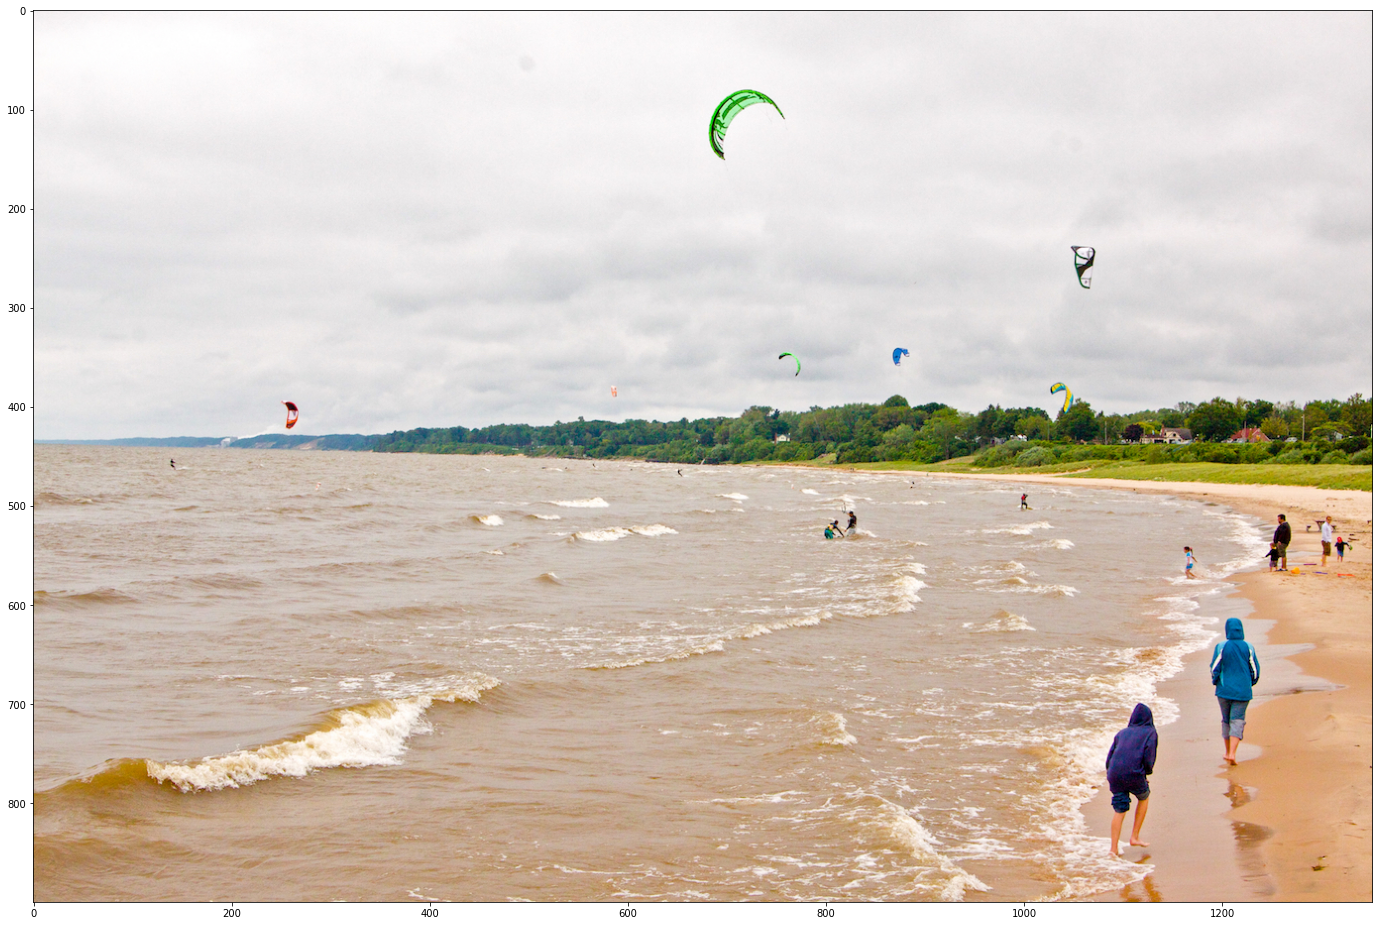

In [ ]:
#@title Image Selection (don't forget to execute the cell!) { display-mode: "form"}
selected_image = 'Beach' # @param ['Beach', 'Dogs', 'Naxos Taverna', 'Beatles', 'Phones', 'Birds']
flip_image_horizontally = True #@param {type:"boolean"}
convert_image_to_grayscale = False #@param {type:"boolean"}

image_path = IMAGES_FOR_TEST[selected_image]
image_np = load_image_into_numpy_array(image_path)

# Flip horizontally
if(flip_image_horizontally):
  image_np[0] = np.fliplr(image_np[0]).copy()

# Convert image to grayscale
if(convert_image_to_grayscale):
  image_np[0] = np.tile(
    np.mean(image_np[0], 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

plt.figure(figsize=(24,32))
plt.imshow(image_np[0])
plt.show()

## 추론하기

추론을 수행하려면 TF Hub 로드 모델을 호출하기만 하면 됩니다.

시도해볼 수 있는 작업:

- `result['detection_boxes']`를 출력하고 상자 위치를 이미지의 상자와 일치시킵니다. 좌표는 정규화된 형식(예: [0, 1] 간격)으로 제공됩니다.
- 결과에 있는 다른 출력 키를 검사합니다. 모델 문서 페이지에서 전체 문서를 볼 수 있습니다(브라우저에서 앞서 출력된 모델 핸들을 가리킴).

In [81]:
# running inference
results = hub_model(image_np)

# different object detection models have additional results
# all of them are explained in the documentation
result = {key:value.numpy() for key,value in results.items()}
print(result.keys())

NameError: name 'hub_model' is not defined

## 결과 시각화하기

여기에서는 추론 단계의 사각형(및 가능한 경우 키포인트)을 표시하기 위해 TensorFlow Object Detection API가 필요합니다.

이 방법을 보여주는 전체 문서는 [여기](https://github.com/tensorflow/models/blob/master/research/object_detection/utils/visualization_utils.py)에서 확인할 수 있습니다.

예를 들어, 여기에서 `min_score_thresh`를 다른 값(0과 1 사이)으로 설정하여 더 많이 감지할 수 있게 하거나 더 많은 감지를 필터링할 수 있습니다.

In [82]:
label_id_offset = 0
image_np_with_detections = image_np.copy()

# Use keypoints if available in detections
keypoints, keypoint_scores = None, None
if 'detection_keypoints' in result:
  keypoints = result['detection_keypoints'][0]
  keypoint_scores = result['detection_keypoint_scores'][0]

viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_detections[0],
      result['detection_boxes'][0],
      (result['detection_classes'][0] + label_id_offset).astype(int),
      result['detection_scores'][0],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=.30,
      agnostic_mode=False,
      keypoints=keypoints,
      keypoint_scores=keypoint_scores,
      keypoint_edges=COCO17_HUMAN_POSE_KEYPOINTS)

plt.figure(figsize=(24,32))
plt.imshow(image_np_with_detections[0])
plt.show()

NameError: name 'result' is not defined